In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importamos los datos

train = pd.read_csv(r'datos/train_tratado.csv')
train.columns

Index(['Unnamed: 0', 'id', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Touchscreen', 'High_resolucion',
       'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S',
       'Windows 7', 'macOS', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
       'Intel Celeron Dual Core', 'Intel Pentium Quad Core', 'A4', 'A6', 'A8',
       'A10', 'A12'],
      dtype='object')

## Preparamos los datos

In [3]:
# Nombramos a 'X' y a 'y'. Quitamos las variables que no son numéricas

X = train[['Inches', 'Ram', 'Memory', 'Weight',
       '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Touchscreen', 'High_resolucion',
       'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S',
       'Windows 7', 'macOS', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
       'Intel Celeron Dual Core', 'Intel Pentium Quad Core', 'A4', 'A6', 'A8',
       'A10', 'A12']]

y = train['Price_euros']

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               912 non-null    int64  
 1   id                       912 non-null    int64  
 2   Company                  912 non-null    object 
 3   Product                  912 non-null    object 
 4   TypeName                 912 non-null    object 
 5   Inches                   912 non-null    float64
 6   ScreenResolution         912 non-null    object 
 7   Cpu                      912 non-null    object 
 8   Ram                      912 non-null    int64  
 9   Memory                   912 non-null    int64  
 10  Gpu                      912 non-null    object 
 11  OpSys                    912 non-null    object 
 12  Weight                   912 non-null    float64
 13  Price_euros              912 non-null    float64
 14  2 in 1 Convertible       9

In [5]:
# Separamos X_train y X_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(729, 30)
(183, 30)
(729,)
(183,)


## Creamos un modelo

In [6]:
from sklearn.linear_model import LinearRegression

#creating LinearRegression Object
model = LinearRegression()

#Training the Data Model
model.fit(X_train, y_train)

LinearRegression()

## **Predictions from our Model**

C:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


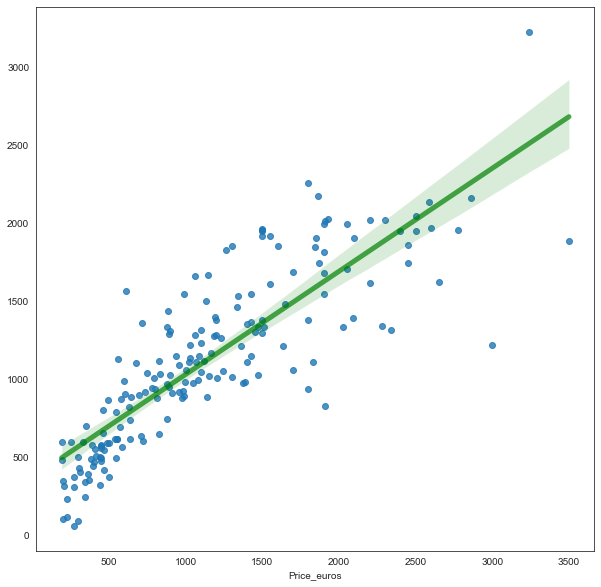

In [7]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.regplot(y_test, model.predict(X_test), line_kws={"color":"green","alpha":0.7,"lw":5});

## Evaluación del modelo

In [8]:
from sklearn import metrics

# Calculamos los errores
print('Train MAE:', metrics.mean_absolute_error(y_train, model.predict(X_train)))
print('Test MAE:', metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("")
print('Train MAPE:', metrics.mean_absolute_percentage_error(y_train, model.predict(X_train)))
print('Test MAPE:', metrics.mean_absolute_percentage_error(y_test, model.predict(X_test)))
print("")
print('Train MSE:', metrics.mean_squared_error(y_train, model.predict(X_train)))
print('Test MSE:', metrics.mean_squared_error(y_test, model.predict(X_test)))
print("")
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
print("")
print('Train score', model.score(X_train, y_train))
print('Test score', model.score(X_test, y_test))

Train MAE: 266.09339362844696
Test MAE: 266.06475461600843

Train MAPE: 0.25920196117022587
Test MAPE: 0.28012732524375633

Train MSE: 150874.95508686014
Test MSE: 145164.85001478292

Train RMSE: 388.4262543738002
Test RMSE: 381.00505247933773

Train score 0.7075299629877951
Test score 0.7051586206607003


## Feature importance
The main difference between __Linear Regression__ and __Tree-based methods__ is that Linear Regression is parametric: it can be writen with a mathematical closed expression depending on some parameters. Therefore, the coefficients are the parameters of the model, and should not be taken as any kind of importances unless the data is normalized.



In [9]:
intercept = model.intercept_
features = pd.DataFrame(model.coef_, X_train.columns, columns=['coefficient'])
features.sort_values('coefficient', ascending=False)

,coefficient
Workstation,625.292953
Windows 7,358.896169
Intel Core i7,261.366701
Touchscreen,220.912046
macOS,210.962704
Intel Core i5,145.420425
Weight,140.629567
Ultrabook,79.766370
Ram,74.184719
Mac OS X,34.289608


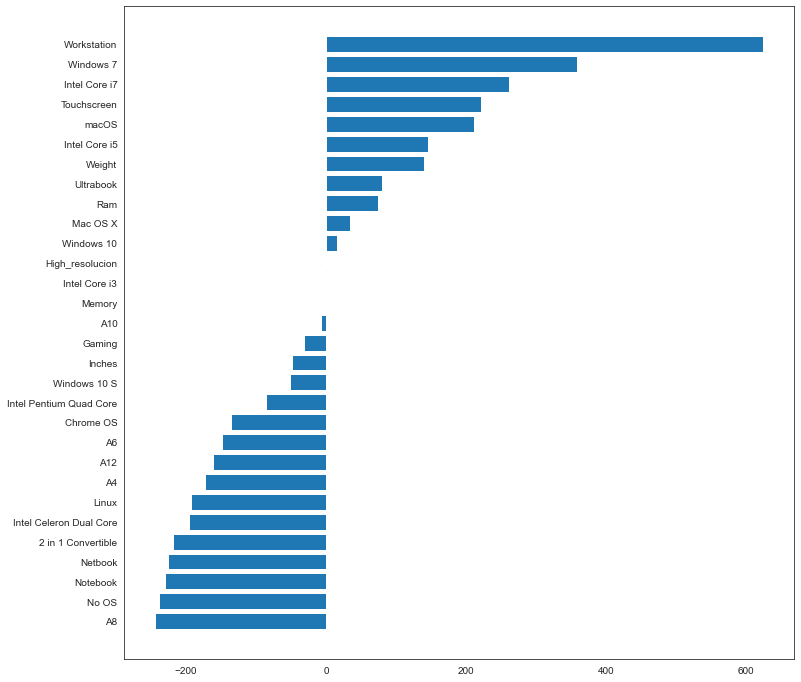

In [10]:
plt.figure(figsize=(12, 12))
features = features.sort_values('coefficient', ascending=True)
plt.barh(features.index, features.coefficient);

# Evaluamos con los datos del data set de tests

In [11]:
X_pred = pd.read_csv("Datos/test_tratado.csv")

In [12]:
X_pred.columns

Index(['Unnamed: 0', 'id', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
       'Workstation', 'Touchscreen', 'High_resolucion', 'Android', 'Chrome OS',
       'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7',
       'macOS', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
       'Intel Celeron Dual Core', 'Intel Pentium Quad Core', 'A4', 'A6', 'A8',
       'A10', 'A12'],
      dtype='object')

In [13]:
X_pred.head()

,Unnamed: 0,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,Intel Core i3,Intel Core i5,Intel Core i7,Intel Celeron Dual Core,Intel Pentium Quad Core,A4,A6,A8,A10,A12
0,0,1184,HP,Pavilion 15-BC000nv,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,6,1000,...,0,0,1,0,0,0,0,0,0,0
1,1,815,Lenovo,Thinkpad T470s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256,...,0,0,1,0,0,0,0,0,0,0
2,2,1244,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,256,...,0,1,0,0,0,0,0,0,0,0
3,3,1121,HP,Spectre Pro,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256,...,0,1,0,0,0,0,0,0,0,0
4,4,443,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4,128,...,0,0,0,0,1,0,0,0,0,0


In [14]:
X_pred_1 = X_pred[['Inches', 'Ram', 'Memory', 'Weight',
       '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Touchscreen', 'High_resolucion',
       'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S',
       'Windows 7', 'macOS', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
       'Intel Celeron Dual Core', 'Intel Pentium Quad Core', 'A4', 'A6', 'A8',
       'A10', 'A12']]

In [15]:
predictions = model.predict(X_pred_1)
predictions = pd.DataFrame(predictions)

In [16]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       391 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [17]:
submission = pd.DataFrame(X_pred['id'].copy())
submission['Price_euros'] = predictions[0].copy()

In [18]:
submission.shape

(391, 2)

# Pasamos el check

In [19]:
import urllib.request
from PIL import Image

In [20]:
sample = pd.read_csv("Datos/sample_submission.csv")

In [21]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [251]:
# chequeator(submission)

You're ready to submit!
